                            OLS Regression Results                            
Dep. Variable:                    NEE   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     2010.
Date:                Sun, 13 Oct 2024   Prob (F-statistic):               0.00
Time:                        17:19:06   Log-Likelihood:                -8846.1
No. Observations:                4383   AIC:                         1.770e+04
Df Residuals:                    4378   BIC:                         1.773e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9904      0.167     23.894      0.0

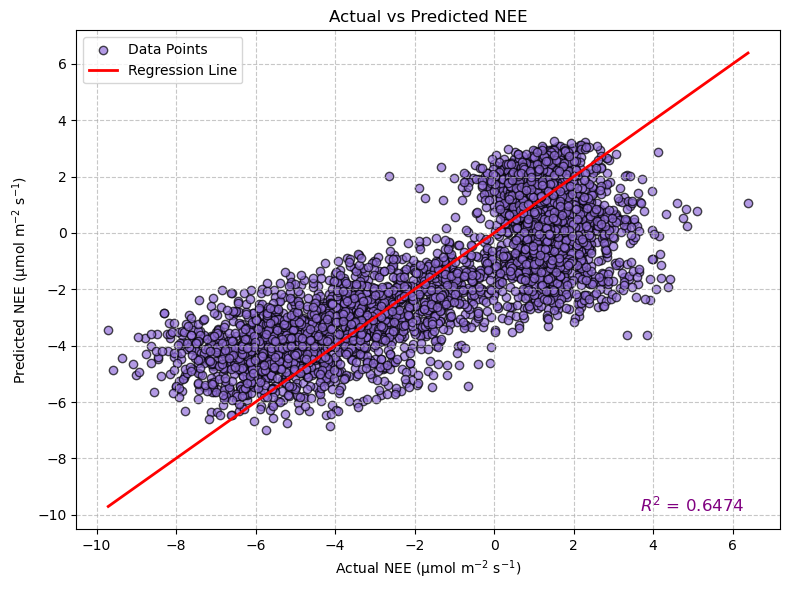

In [80]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

# Load the dataset
file_path = '../Data/US-MMS_short.csv'  # Adjust the path as needed
df = pd.read_csv(file_path)

# Calculate daily averages for relevant variables
df_daily = df.groupby(['YEAR', 'MONTH', 'DAY']).mean().reset_index()

# Extract the predictor variables (X) and target variable (y)
X = df_daily[['LAI', 'SW_NET', 'TA', 'SWC']]
y = df_daily['NEE']

# Add a constant to the predictors for the intercept term
X = sm.add_constant(X)

# Fit the multivariate linear regression model
model = sm.OLS(y, X).fit()

# Display the model summary
print(model.summary())

# Calculate R-squared and RMSE
r_squared = model.rsquared
y_pred = model.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))

# Print R-squared and RMSE values
print(f"R-squared: {r_squared:.4f}")
print(f"RMSE: {rmse:.4f} µmol/m²/s")

# Plotting the relationship between actual and predicted NEE values
plt.figure(figsize=(8, 6))

# Scatter plot of actual vs. predicted values in purple
plt.scatter(y, y_pred, edgecolor='k', facecolor='mediumpurple', alpha=0.7, label='Data Points')

# Plot the regression line in red
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', lw=2, label='Regression Line')

# Superscript formatting for "m²" in the labels
plt.xlabel('Actual NEE (µmol m$^{-2}$ s$^{-1}$)')
plt.ylabel('Predicted NEE (µmol m$^{-2}$ s$^{-1}$)')
plt.title('Actual vs Predicted NEE')

# Display the R-squared value in the bottom-right corner with purple text
plt.text(0.95, 0.05, f'$R^2$ = {r_squared:.4f}', horizontalalignment='right', 
         verticalalignment='center', transform=plt.gca().transAxes, fontsize=12, color='purple')

# Add a grid and legend for clarity
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


Model with all four variables:
R-squared: 0.6474, RMSE: 1.8209

Model excluding LAI:
R-squared: 0.5196, RMSE: 2.1255

Model excluding SW_NET:
R-squared: 0.6091, RMSE: 1.9174

Model excluding TA:
R-squared: 0.6397, RMSE: 1.8409

Model excluding SWC:
R-squared: 0.6458, RMSE: 1.8251


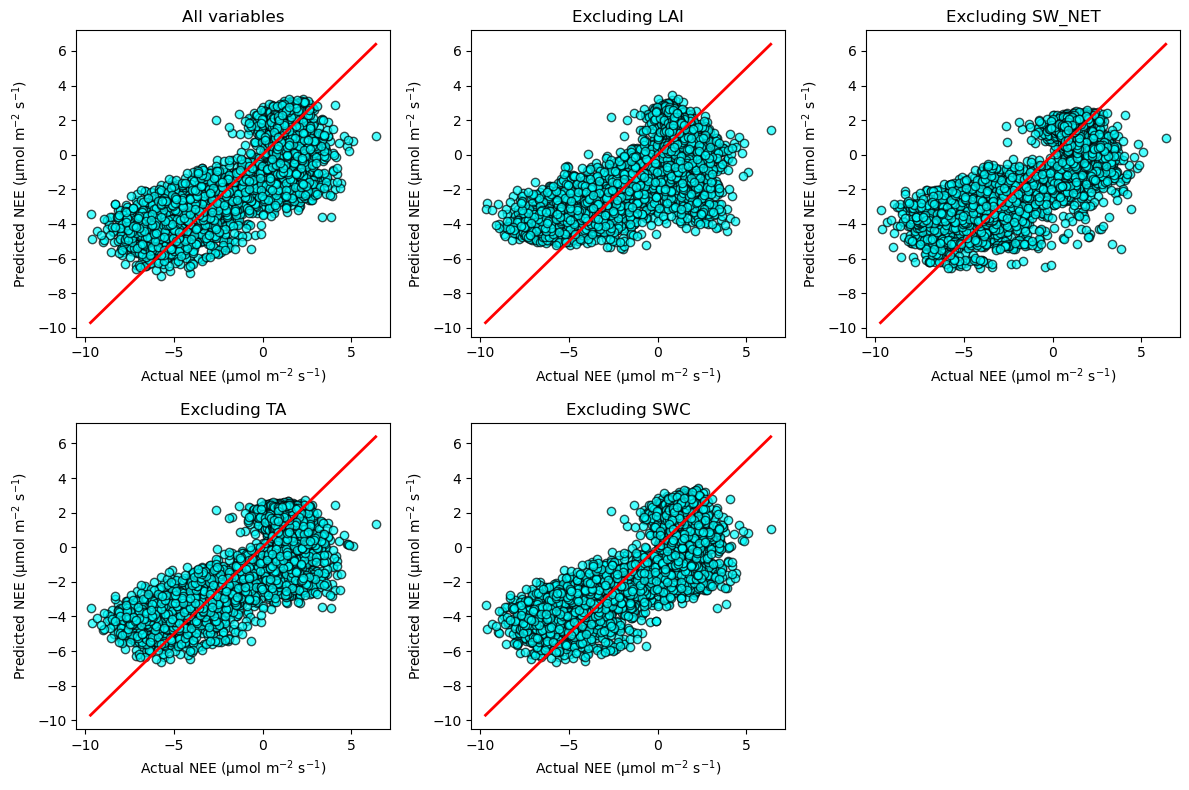

In [24]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

# Load the dataset
file_path = '../Data/US-MMS_short.csv'  # Adjust the path as needed
df = pd.read_csv(file_path)

# Calculate daily averages for relevant variables
df_daily = df.groupby(['YEAR', 'MONTH', 'DAY']).mean().reset_index()

# Extract the target variable (y)
y = df_daily['NEE']

# Function to calculate R-squared and RMSE for different models and return predictions
def run_regression(X, y):
    X = sm.add_constant(X)  # Add a constant for the intercept term
    model = sm.OLS(y, X).fit()
    r_squared = model.rsquared
    y_pred = model.predict(X)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    return r_squared, rmse, y_pred

# Original model with all four variables
X_all = df_daily[['LAI', 'SW_NET', 'TA', 'SWC']]
r_squared_all, rmse_all, y_pred_all = run_regression(X_all, y)

# Model excluding LAI
X_no_LAI = df_daily[['SW_NET', 'TA', 'SWC']]
r_squared_no_LAI, rmse_no_LAI, y_pred_no_LAI = run_regression(X_no_LAI, y)

# Model excluding SW_NET
X_no_SW_NET = df_daily[['LAI', 'TA', 'SWC']]
r_squared_no_SW_NET, rmse_no_SW_NET, y_pred_no_SW_NET = run_regression(X_no_SW_NET, y)

# Model excluding TA
X_no_TA = df_daily[['LAI', 'SW_NET', 'SWC']]
r_squared_no_TA, rmse_no_TA, y_pred_no_TA = run_regression(X_no_TA, y)

# Model excluding SWC
X_no_SWC = df_daily[['LAI', 'SW_NET', 'TA']]
r_squared_no_SWC, rmse_no_SWC, y_pred_no_SWC = run_regression(X_no_SWC, y)

# Print the results
print("Model with all four variables:")
print(f"R-squared: {r_squared_all:.4f}, RMSE: {rmse_all:.4f}")

print("\nModel excluding LAI:")
print(f"R-squared: {r_squared_no_LAI:.4f}, RMSE: {rmse_no_LAI:.4f}")

print("\nModel excluding SW_NET:")
print(f"R-squared: {r_squared_no_SW_NET:.4f}, RMSE: {rmse_no_SW_NET:.4f}")

print("\nModel excluding TA:")
print(f"R-squared: {r_squared_no_TA:.4f}, RMSE: {rmse_no_TA:.4f}")

print("\nModel excluding SWC:")
print(f"R-squared: {r_squared_no_SWC:.4f}, RMSE: {rmse_no_SWC:.4f}")

# Plotting actual vs predicted NEE for each model
plt.figure(figsize=(12, 8))

# Plot for the full model
plt.subplot(2, 3, 1)
plt.scatter(y, y_pred_all, edgecolor='k', facecolor='cyan', alpha=0.7)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', lw=2)
plt.xlabel('Actual NEE (µmol m$^{-2}$ s$^{-1}$)')
plt.ylabel('Predicted NEE (µmol m$^{-2}$ s$^{-1}$)')
plt.title('All variables')

# Plot for model excluding LAI
plt.subplot(2, 3, 2)
plt.scatter(y, y_pred_no_LAI, edgecolor='k', facecolor='cyan', alpha=0.7)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', lw=2)
plt.xlabel('Actual NEE (µmol m$^{-2}$ s$^{-1}$)')
plt.ylabel('Predicted NEE (µmol m$^{-2}$ s$^{-1}$)')
plt.title('Excluding LAI')

# Plot for model excluding SW_NET
plt.subplot(2, 3, 3)
plt.scatter(y, y_pred_no_SW_NET, edgecolor='k', facecolor='cyan', alpha=0.7)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', lw=2)
plt.xlabel('Actual NEE (µmol m$^{-2}$ s$^{-1}$)')
plt.ylabel('Predicted NEE (µmol m$^{-2}$ s$^{-1}$)')
plt.title('Excluding SW_NET')

# Plot for model excluding TA
plt.subplot(2, 3, 4)
plt.scatter(y, y_pred_no_TA, edgecolor='k', facecolor='cyan', alpha=0.7)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', lw=2)
plt.xlabel('Actual NEE (µmol m$^{-2}$ s$^{-1}$)')
plt.ylabel('Predicted NEE (µmol m$^{-2}$ s$^{-1}$)')
plt.title('Excluding TA')

# Plot for model excluding SWC
plt.subplot(2, 3, 5)
plt.scatter(y, y_pred_no_SWC, edgecolor='k', facecolor='cyan', alpha=0.7)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', lw=2)
plt.xlabel('Actual NEE (µmol m$^{-2}$ s$^{-1}$)')
plt.ylabel('Predicted NEE (µmol m$^{-2}$ s$^{-1}$)')
plt.title('Excluding SWC')

plt.tight_layout()
plt.show()


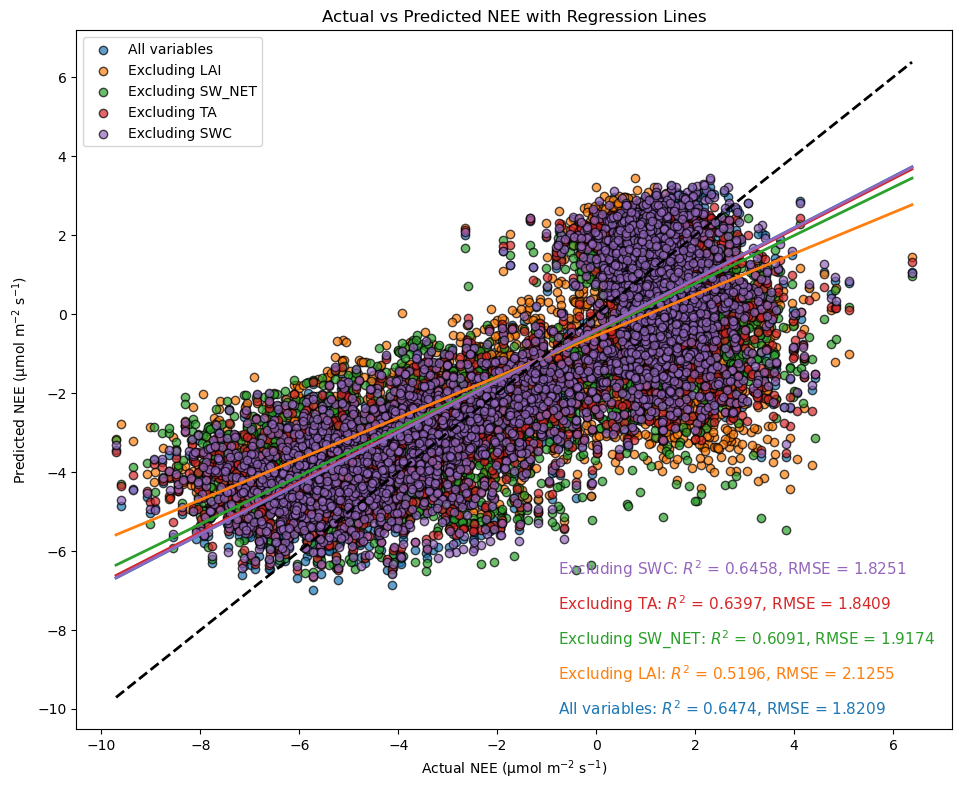

In [48]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

# Load the dataset
file_path = '../Data/US-MMS_short.csv'  # Adjust the path as needed
df = pd.read_csv(file_path)

# Calculate daily averages for relevant variables
df_daily = df.groupby(['YEAR', 'MONTH', 'DAY']).mean().reset_index()

# Extract the target variable (y)
y = df_daily['NEE']

# Function to calculate R-squared, RMSE, and predictions for different models
def run_regression(X, y):
    X = sm.add_constant(X)  # Add a constant for the intercept term
    model = sm.OLS(y, X).fit()
    r_squared = model.rsquared
    y_pred = model.predict(X)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    return r_squared, rmse, y_pred

# Original model with all four variables
X_all = df_daily[['LAI', 'SW_NET', 'TA', 'SWC']]
r_squared_all, rmse_all, y_pred_all = run_regression(X_all, y)

# Model excluding LAI
X_no_LAI = df_daily[['SW_NET', 'TA', 'SWC']]
r_squared_no_LAI, rmse_no_LAI, y_pred_no_LAI = run_regression(X_no_LAI, y)

# Model excluding SW_NET
X_no_SW_NET = df_daily[['LAI', 'TA', 'SWC']]
r_squared_no_SW_NET, rmse_no_SW_NET, y_pred_no_SW_NET = run_regression(X_no_SW_NET, y)

# Model excluding TA
X_no_TA = df_daily[['LAI', 'SW_NET', 'SWC']]
r_squared_no_TA, rmse_no_TA, y_pred_no_TA = run_regression(X_no_TA, y)

# Model excluding SWC
X_no_SWC = df_daily[['LAI', 'SW_NET', 'TA']]
r_squared_no_SWC, rmse_no_SWC, y_pred_no_SWC = run_regression(X_no_SWC, y)

# Plotting actual vs predicted NEE for all models on the same plot with regression lines
plt.figure(figsize=(10, 8))

# Unique colors for each model
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']  # Unique colors for each model
labels = ['All variables', 'Excluding LAI', 'Excluding SW_NET', 'Excluding TA', 'Excluding SWC']
r_squared_values = [r_squared_all, r_squared_no_LAI, r_squared_no_SW_NET, r_squared_no_TA, r_squared_no_SWC]
rmse_values = [rmse_all, rmse_no_LAI, rmse_no_SW_NET, rmse_no_TA, rmse_no_SWC]
predictions = [y_pred_all, y_pred_no_LAI, y_pred_no_SW_NET, y_pred_no_TA, y_pred_no_SWC]

# Plot and annotate the R² and RMSE values
for i, (color, label, y_pred, r_squared, rmse) in enumerate(zip(colors, labels, predictions, r_squared_values, rmse_values)):
    plt.scatter(y, y_pred, edgecolor='k', facecolor=color, alpha=0.7, label=label)
    # Plot regression line
    plt.plot(np.unique(y), np.poly1d(np.polyfit(y, y_pred, 1))(np.unique(y)), color=color, lw=2)
    # Annotate R-squared and RMSE values inside the chart, shifting left and down
    plt.text(0.55, 0.02 + i * 0.05, f'{label}: $R^2$ = {r_squared:.4f}, RMSE = {rmse:.4f}', color=color, transform=plt.gca().transAxes, fontsize=11)

# Plot the line for actual vs predicted perfect match
plt.plot([min(y), max(y)], [min(y), max(y)], color='black', lw=2, linestyle='--')

# Adding labels and title
plt.xlabel('Actual NEE (µmol m$^{-2}$ s$^{-1}$)')
plt.ylabel('Predicted NEE (µmol m$^{-2}$ s$^{-1}$)')
plt.title('Actual vs Predicted NEE with Regression Lines')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


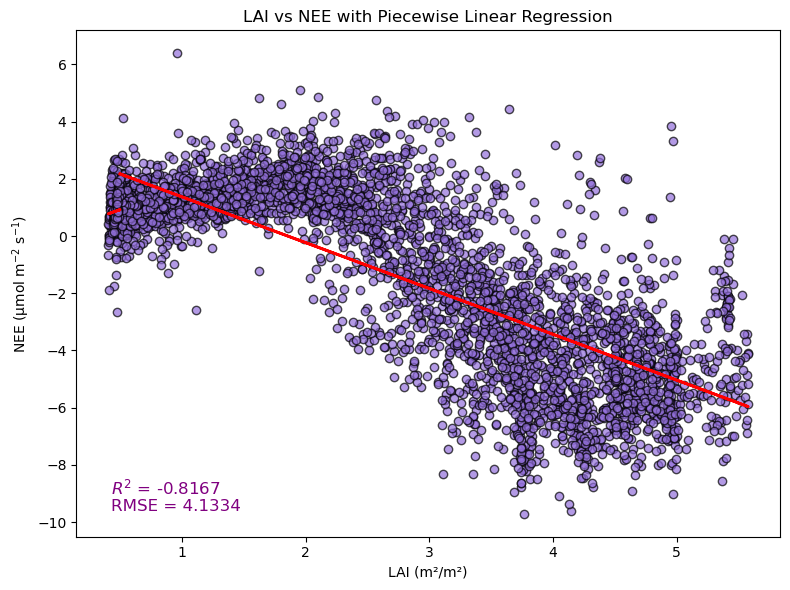

In [56]:
# Visualize the relationship between LAI and NEE with the piecewise regression line
plt.figure(figsize=(8, 6))

# Plot the scatter of actual data in light purple
plt.scatter(X, y, color='mediumpurple', edgecolor='k', alpha=0.7)
plt.xlabel('LAI (m²/m²)')
plt.ylabel('NEE (µmol m$^{-2}$ s$^{-1}$)')
plt.title('LAI vs NEE with Piecewise Linear Regression')

# Plot the regression lines for each piece of the piecewise model in red
plt.plot(X[X['LAI'] < breakpoint], y_pred_low, color='red', lw=2, label=f'LAI < {breakpoint}')
plt.plot(X[X['LAI'] >= breakpoint], y_pred_high, color='red', lw=2, label=f'LAI >= {breakpoint}')

# Annotate the R-squared and RMSE values in the bottom-left corner
plt.text(0.05, 0.05, f'$R^2$ = {r_squared_piecewise:.4f}\nRMSE = {rmse_piecewise:.4f}', 
         color='purple', transform=plt.gca().transAxes, fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


Optimization terminated successfully.
         Current function value: 0.383618
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                98560
Model:                          Logit   Df Residuals:                    98556
Method:                           MLE   Df Model:                            3
Date:                Sun, 13 Oct 2024   Pseudo R-squ.:                  0.4117
Time:                        18:19:29   Log-Likelihood:                -37809.
converged:                       True   LL-Null:                       -64271.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.0297      0.084   -108.109      0.000      -9.193      -8.866
x1             0.0101    7.4e

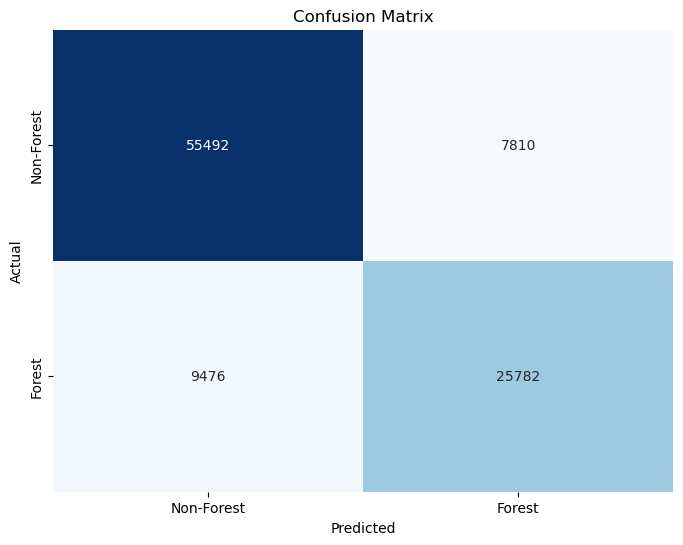

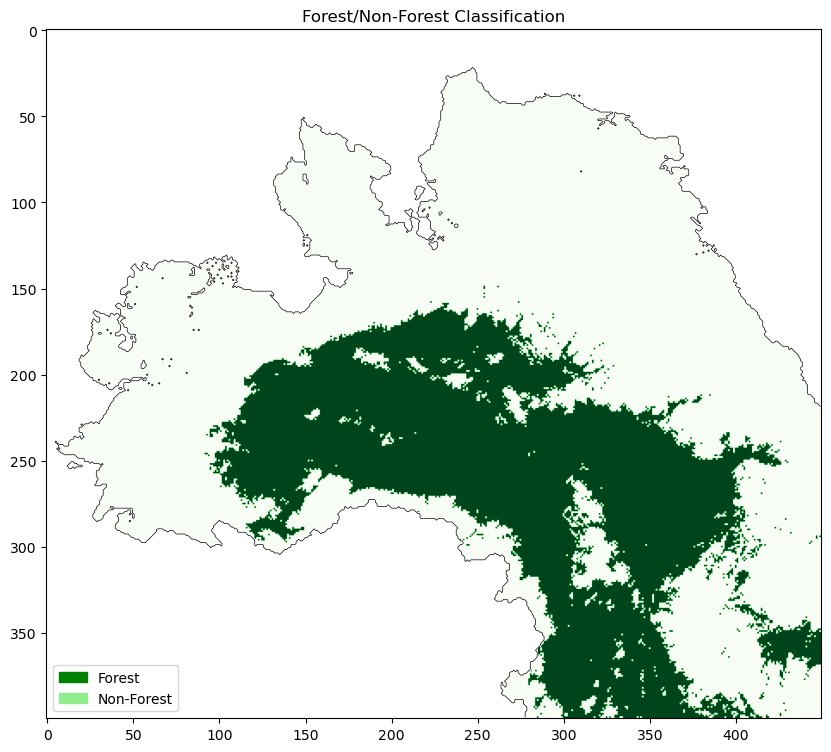

In [107]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Load the data from the .npy files
LC = np.load('../Data/AK_landcover.npy')
DD5 = np.load('../Data/AK_DD5.npy')
PAS = np.load('../Data/AK_PAS.npy')
Ele = np.load('../Data/AK_elevation.npy')

# Filter valid data: only consider pixels with valid values across all datasets
veg_area = ~np.isnan(LC + DD5 + PAS + Ele)

# Create the target variable 'y', where forest is when land cover < 3 (1 for forest, 0 for non-forest)
y = (LC < 3) * 1  # Forest (LC < 3) is classified as 1, non-forest as 0
y = y[veg_area]    # Filter to valid pixels

# Create the explanatory variables matrix 'X'
X = np.column_stack((DD5[veg_area], PAS[veg_area], Ele[veg_area]))

# Add a constant (intercept) to the explanatory variables
X = sm.add_constant(X)

# Fit the logistic regression model
lg_reg = sm.Logit(y, X).fit()

# Print model summary
print(lg_reg.summary())

# Get predicted probabilities from the logistic regression model
yhat_prob = lg_reg.predict(X)

# Classify as forest (1) if the predicted probability > 0.5, otherwise non-forest (0)
yhat = (yhat_prob > 0.5).astype(int)

# Calculate the accuracy of the model
acc = accuracy_score(y, yhat)
print(f"Accuracy: {acc}")

# Calculate and display the confusion matrix
cm = confusion_matrix(y, yhat)
print(f"Confusion Matrix:\n{cm}")

# Plot the confusion matrix using Seaborn for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Non-Forest', 'Forest'], 
            yticklabels=['Non-Forest', 'Forest'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Optionally, visualize the forest classification (Forest/Non-Forest)
plt.figure(figsize=(10, 10))

# Initialize empty map with the same shape as the original land cover
forest_map = np.full(LC.shape, np.nan)
forest_map[veg_area] = yhat  # Fill classified data

# Plot the forest classification map
img = plt.imshow(forest_map, cmap='Greens', vmin=0, vmax=1)  # Use binary color map for forest/non-forest

# Create an outline of the landmass using the contour function
plt.contour(veg_area, colors='black', linewidths=0.5)  # Thin black line for landmass boundary

# Add custom legend for forest and non-forest without (1) and (0)
from matplotlib.patches import Patch

forest_patch = Patch(color='green', label='Forest')
non_forest_patch = Patch(color='lightgreen', label='Non-Forest')

# Place the legend in the bottom left-hand corner
plt.legend(handles=[forest_patch, non_forest_patch], loc='lower left', frameon=True)

plt.title('Forest/Non-Forest Classification')
plt.show()


Area Under the ROC Curve (AUC): 0.901


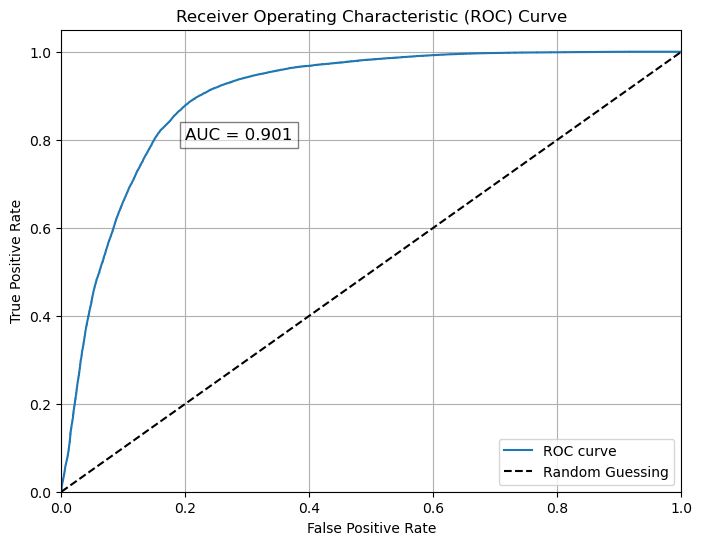

In [113]:
# Import additional required libraries
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities from the logistic regression model
yhat_prob = lg_reg.predict(X)

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y, yhat_prob)

# Calculate the AUC (Area Under the ROC Curve)
auc = roc_auc_score(y, yhat_prob)
print(f"Area Under the ROC Curve (AUC): {auc:.3f}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')  # Dashed diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# Add AUC value as text inside the plot
plt.text(0.2, 0.8, f'AUC = {auc:.3f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Posterior Probability (Forest | DD5=800): 0.440600
Posterior Probability (Non-Forest | DD5=800): 0.559400
The location with DD5 = 800°C is more likely to be non-forest.


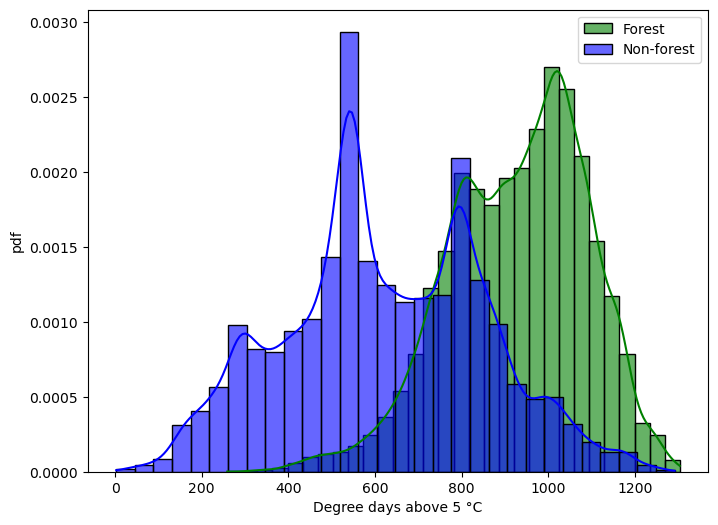

In [121]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Load the necessary data
LC = np.load('../Data/AK_landcover.npy')
DD5 = np.load('../Data/AK_DD5.npy')

# Filter valid data: only consider pixels with valid DD5 and land cover values
valid_pixels = ~np.isnan(LC + DD5)

# Create the target variable 'y', where forest is when land cover < 3 (1 for forest, 0 for non-forest)
y = (LC < 3) * 1  # Forest (LC < 3) is classified as 1, non-forest as 0
y = y[valid_pixels]  # Filter to valid pixels
DD5_valid = DD5[valid_pixels]

# Step 1: Calculate prior probabilities P(Forest) and P(Non-Forest)
P_forest = np.mean(y == 1)
P_non_forest = np.mean(y == 0)

# Step 2: Calculate means and standard deviations of DD5 for forest and non-forest areas
mean_dd5_forest = np.mean(DD5_valid[y == 1])
std_dd5_forest = np.std(DD5_valid[y == 1])

mean_dd5_non_forest = np.mean(DD5_valid[y == 0])
std_dd5_non_forest = np.std(DD5_valid[y == 0])

# Step 3: Calculate Gaussian densities for DD5 = 800 using Equation (12)
dd5_value = 800

# Gaussian density for forest f_forest(x)
f_forest = (1 / (np.sqrt(2 * np.pi) * std_dd5_forest)) * np.exp(-0.5 * ((dd5_value - mean_dd5_forest) / std_dd5_forest) ** 2)

# Gaussian density for non-forest f_non_forest(x)
f_non_forest = (1 / (np.sqrt(2 * np.pi) * std_dd5_non_forest)) * np.exp(-0.5 * ((dd5_value - mean_dd5_non_forest) / std_dd5_non_forest) ** 2)

# Step 4: Calculate the posterior probabilities using Equation (11)
posterior_forest = (P_forest * f_forest) / (P_forest * f_forest + P_non_forest * f_non_forest)
posterior_non_forest = (P_non_forest * f_non_forest) / (P_forest * f_forest + P_non_forest * f_non_forest)

# Print the results
print(f"Posterior Probability (Forest | DD5=800): {posterior_forest:.6f}")
print(f"Posterior Probability (Non-Forest | DD5=800): {posterior_non_forest:.6f}")

# Step 5: Classify based on the higher posterior probability
if posterior_forest > posterior_non_forest:
    print(f"The location with DD5 = 800°C is more likely to be forest.")
else:
    print(f"The location with DD5 = 800°C is more likely to be non-forest.")

# Step 6: Plot the histograms of forest and non-forest DD5 distributions

# Separate DD5 values for forest and non-forest
DD5_forest = DD5_valid[y == 1]
DD5_non_forest = DD5_valid[y == 0]

# Set up the plot
plt.figure(figsize=(8, 6))

# Plot the histograms with PDF (density=True) for both forest and non-forest areas
sns.histplot(DD5_forest, color='green', label='Forest', kde=True, stat="density", bins=30, alpha=0.6)
sns.histplot(DD5_non_forest, color='blue', label='Non-forest', kde=True, stat="density", bins=30, alpha=0.6)

# Add labels and title
plt.xlabel('Degree days above 5 °C')
plt.ylabel('pdf')
plt.legend()

# Display the plot
plt.show()


In [20]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

LC = np.load('../Data/AK_landcover.npy')
DD5 = np.load('../Data/AK_DD5.npy')

# Filter valid pixels
valid_pixels = ~np.isnan(LC + DD5)

# Create the target variable 'y', where forest is when land cover < 3 (1 for forest, 0 for non-forest)
y = (LC < 3) * 1
y = y[valid_pixels]
DD5_valid = DD5[valid_pixels]

# Step 1: Fit a univariate logistic regression model using DD5 as the explanatory variable
X = sm.add_constant(DD5_valid)  # Add constant (intercept) to the explanatory variable
logit_model = sm.Logit(y, X).fit()

# Step 2: Get predicted probabilities from the logistic regression model
yhat_prob_logit = logit_model.predict(X)

# Classify as forest (1) if the predicted probability > 0.5, otherwise non-forest (0)
yhat_logit = (yhat_prob_logit > 0.5).astype(int)

# Step 3: Calculate the posterior probabilities for DD5 = 800 from logistic regression
dd5_value = 800
# Ensure the array includes both the constant (intercept) and the DD5 value
dd5_value_array = np.array([[1, dd5_value]])  # Add constant and DD5 value for prediction
posterior_forest_logit = logit_model.predict(dd5_value_array)[0]

# Output the posterior probabilities
print(f"Posterior Probability (Forest | DD5=800): {posterior_forest_logit:.6f}")
print(f"Posterior Probability (Non-Forest | DD5=800): {1 - posterior_forest_logit:.6f}")


Optimization terminated successfully.
         Current function value: 0.443151
         Iterations 7
Posterior Probability (Forest | DD5=800): 0.375773
Posterior Probability (Non-Forest | DD5=800): 0.624227


In [22]:
# Import necessary libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Load the dataset
file_path = '../Data/US-MMS_short.csv'  # Adjust the path as needed
df = pd.read_csv(file_path)

# Calculate daily averages for relevant variables
df_daily = df.groupby(['YEAR', 'MONTH', 'DAY']).mean().reset_index()

# Extract the target variable (y) and explanatory variables (X)
y = df_daily['NEE']
X = df_daily[['LAI', 'SW_NET', 'TA', 'SWC']]

# Add a constant (intercept) to the explanatory variables
X = sm.add_constant(X)

# Fit the original multivariate linear regression model
model = sm.OLS(y, X).fit()

# Print original model results
print("Original Regression Results:")
print(model.summary())

# Function to calculate regression coefficients for bootstrap samples
def bootstrap_regression(X, y, n_bootstrap=100):
    coefs = []
    for _ in range(n_bootstrap):
        # Create a random sample with replacement from the original data
        sample_idx = np.random.choice(np.arange(len(y)), size=len(y), replace=True)
        X_sample = X.iloc[sample_idx]
        y_sample = y.iloc[sample_idx]
        
        # Fit the regression model on the bootstrap sample
        model_sample = sm.OLS(y_sample, X_sample).fit()
        coefs.append(model_sample.params)
    
    # Convert coefficients list to DataFrame
    coefs_df = pd.DataFrame(coefs)
    return coefs_df

# Perform 100 bootstrap samples
n_bootstrap = 100
bootstrap_coefs = bootstrap_regression(X, y, n_bootstrap)

# Calculate 95% confidence intervals for each coefficient from the bootstrap distribution
ci_lower = bootstrap_coefs.quantile(0.025)
ci_upper = bootstrap_coefs.quantile(0.975)

# Display the original coefficients and their bootstrap confidence intervals
print("\nOriginal Coefficients and Bootstrap Confidence Intervals (95%):")
print(pd.DataFrame({
    "Original Coef": model.params,
    "Bootstrap Lower CI": ci_lower,
    "Bootstrap Upper CI": ci_upper
}))

# Compare RMSE of original model and bootstrap estimates
y_pred = model.predict(X)
rmse_original = np.sqrt(mean_squared_error(y, y_pred))

# Bootstrap RMSE
bootstrap_rmse = []
for i in range(n_bootstrap):
    y_sample_pred = sm.OLS(y, X).fit().predict(X)
    bootstrap_rmse.append(np.sqrt(mean_squared_error(y, y_sample_pred)))

# Calculate 95% confidence intervals of RMSE
rmse_lower = np.percentile(bootstrap_rmse, 2.5)
rmse_upper = np.percentile(bootstrap_rmse, 97.5)

# Display RMSE and CI
print(f"\nOriginal RMSE: {rmse_original:.4f}")
print(f"Bootstrap RMSE CI (95%): [{rmse_lower:.4f}, {rmse_upper:.4f}]")

# Discuss comparison of results
print("\nDiscussion:")
print("Comparing the original confidence intervals (based on parametric assumptions) with the bootstrap confidence intervals, "
      "we can evaluate whether the nonparametric method yields similar or different results. "
      "In cases where parametric assumptions might not hold, bootstrap can provide more robust estimates, "
      "but typically, results are consistent if assumptions are met.")


Original Regression Results:
                            OLS Regression Results                            
Dep. Variable:                    NEE   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     2010.
Date:                Thu, 17 Oct 2024   Prob (F-statistic):               0.00
Time:                        19:02:37   Log-Likelihood:                -8846.1
No. Observations:                4383   AIC:                         1.770e+04
Df Residuals:                    4378   BIC:                         1.773e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9904  

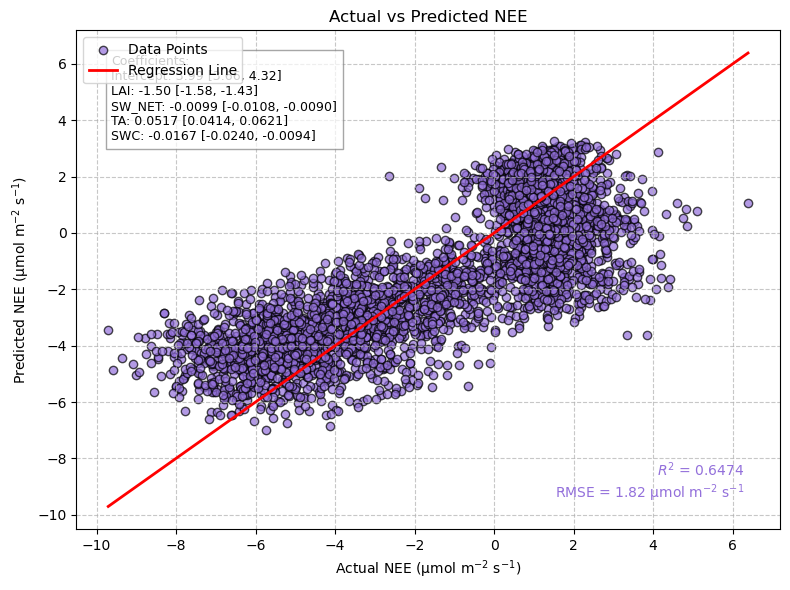

In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

# Assuming that 'df_daily', 'X', 'y', and 'model' are already defined
# R-squared and RMSE calculations
r_squared = model.rsquared
y_pred = model.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))

# Plotting the relationship between actual and predicted NEE values
plt.figure(figsize=(8, 6))

# Scatter plot of actual vs. predicted values
plt.scatter(y, y_pred, edgecolor='k', facecolor='mediumpurple', alpha=0.7, label='Data Points')

# Plot the regression line
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', lw=2, label='Regression Line')

# Display the R-squared and RMSE in the bottom-right
plt.text(0.95, 0.05, f'$R^2$ = {r_squared:.4f}\nRMSE = {rmse:.2f} µmol m$^{{-2}}$ s$^{{-1}}$', 
         ha='right', va='bottom', transform=plt.gca().transAxes, fontsize=10, color='mediumpurple')

# Display the regression coefficients and confidence intervals in a box
coeff_text = (f"Coefficients:\n"
              f"Intercept: 3.99 [3.66, 4.32]\n"
              f"LAI: -1.50 [-1.58, -1.43]\n"
              f"SW_NET: -0.0099 [-0.0108, -0.0090]\n"
              f"TA: 0.0517 [0.0414, 0.0621]\n"
              f"SWC: -0.0167 [-0.0240, -0.0094]")
plt.gca().text(0.05, 0.95, coeff_text, ha='left', va='top', transform=plt.gca().transAxes, fontsize=9, 
               bbox=dict(facecolor='white', alpha=0.7, edgecolor='grey'))

# Add labels and legend
plt.xlabel('Actual NEE (µmol m$^{-2}$ s$^{-1}$)')
plt.ylabel('Predicted NEE (µmol m$^{-2}$ s$^{-1}$)')
plt.title('Actual vs Predicted NEE')
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()
